In [ ]:
!pip install TFANN

  Created wheel for TFANN: filename=TFANN-1.0.1-cp36-none-any.whl size=7539 sha256=77be003262db23750c4eb031a2845b4547c611d8d3d356bd55e3f816d4b08437
  Stored in directory: /root/.cache/pip/wheels/3b/38/aa/a57c9b8bdeccf63d4a14ced9ab09a1b4cc4cb3b48fadecf906
Successfully built TFANN


Saving RDS-A.csv to RDS-A.csv


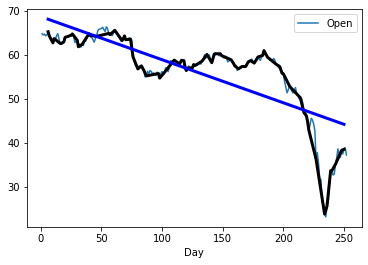

In [ ]:
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from TFANN import ANNR
from google.colab import files

df = files.upload()

df = pd.read_csv('RDS-A.csv')

df.head()
#Making date to day count
df.insert(0, "Day", range(1, 1+len(df)))
df.head()
#Opening the graph headers
df.plot.line(x = "Day", y = "Open")

#Learning Module
X = pd.Series(df["Day"]).values.reshape(-1, 1)
y = pd.Series(df["Open"]).values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.predict(np.array([[3]]))

s = np.array(sorted(list(zip(X_test, y_test))))
X_test, y_test = s[:,0], s[:,1]
y_pred = reg.predict(X_test)
#Plotting the graph
plt.plot(X_test, y_test,  color='black', linewidth=3)
plt.plot(X_test, y_pred, color='blue', linewidth=3)
#Showing the graph
plt.show()

In [ ]:
!pip install alpha_vantage

  Created wheel for alpha-vantage: filename=alpha_vantage-2.1.3-cp36-none-any.whl size=14870 sha256=83ab76b4fefc8d4314a1deb43d02f68c0a8a6d6d8dc4604a717c8e83b2a453e3
  Stored in directory: /root/.cache/pip/wheels/d4/75/c2/483b0a988fd965b1128c1396a0ffadfb8903bd2bb569220048
Successfully built alpha-vantage


In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import time

api_key = '987ARIGIV8HI452L'

ts = TimeSeries(key = api_key, output_format = 'pandas')
data, meta_data = ts.get_intraday(symbol='TSLA', interval = '1min', outputsize = 'full',)
na_values = ['nan']
print(data,)

i=1

close_data = data['4. close']
percentage_change = close_data.pct_change()
print()
print(percentage_change)
print()
last_change = percentage_change[-1]

if abs(last_change) > 0.0004:
  print("LAST CHANGE",last_change)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2020-04-14 16:00:00  710.9200  713.4200  709.6900  709.7800   162627.0
2020-04-14 15:59:00  711.7899  711.7899  709.9100  710.6800    94737.0
2020-04-14 15:58:00  711.3100  712.4000  710.0500  711.4300    93631.0
2020-04-14 15:57:00  706.5500  711.5000  706.5100  711.1800   129125.0
2020-04-14 15:56:00  704.7035  706.9599  704.0100  706.6050    79582.0
...                       ...       ...       ...       ...        ...
2020-04-08 09:35:00  554.1800  554.1800  554.1800  554.1800    38683.0
2020-04-08 09:34:00  553.4300  555.0200  551.5672  554.7858    55125.0
2020-04-08 09:33:00  555.7500  557.0500  552.1200  553.6457    57681.0
2020-04-08 09:32:00  554.1500  557.2081  552.0650  555.7900    98289.0
2020-04-08 09:31:00  554.0100  554.0100  554.0100  554.0100   422678.0

[1556 rows x 5 columns]

date
2020-04-14 16:00:00         NaN
2020-04-14 15: